In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])
    
    

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ration between positive and negative is 100 : 2, in the 2nd data its 100:20, in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

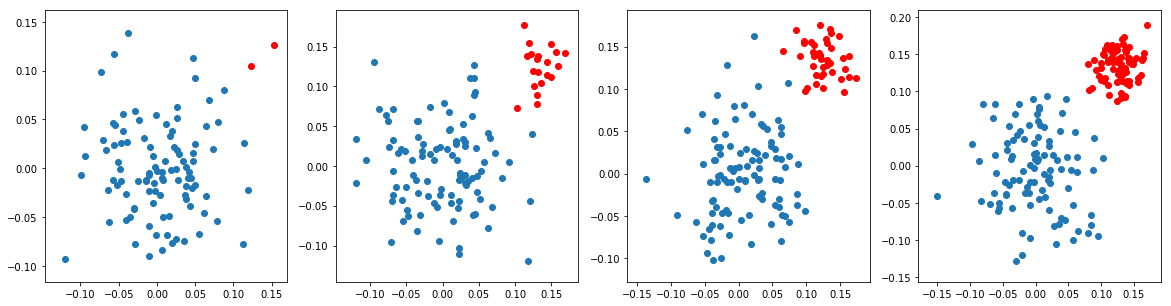

In [101]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1) # https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1) # difference between reshape(1,-1) and reshape(-1,1) : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and         jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper and atach the picture, or record a video upload it in assignment. 
</pre>

In [102]:
def SVM_implementation(ratios,D,C):
    #print("For C = ",C)
    for j,i in enumerate(ratios):
        print("For ",D[j])
        plt.figure(figsize=(20,5))
        for k in range(len(C)):
            plt.subplot(1, 3, k+1) # https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
            X_p=np.random.normal(0,0.05,size=(i[0],2))
            X_n=np.random.normal(0.13,0.02,size=(i[1],2))
            y_p=np.array([1]*i[0]).reshape(-1,1) # difference between reshape(1,-1) and reshape(-1,1) : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
            y_n=np.array([0]*i[1]).reshape(-1,1)
            X=np.vstack((X_p,X_n))
            y=np.vstack((y_p,y_n))
            
            plt.scatter(X_p[:,0],X_p[:,1])
            plt.scatter(X_n[:,0],X_n[:,1],color='red')
            plt.title("C = {0}".format(C[k]))
        
            clf = SVC(C=C[k],kernel = 'linear')
            clf.fit(X,y)
            #print("for {0},number of support vectors = {1}".format(D[j],clf.n_support_))
            plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='red')
            y_min, y_max = x1[:, 1].min(), x1[:, 1].max()
            draw_line(clf.coef_[0],clf.intercept_,y_min,y_max)
        plt.show()

For  Dataset_1


<Figure size 1440x360 with 0 Axes>

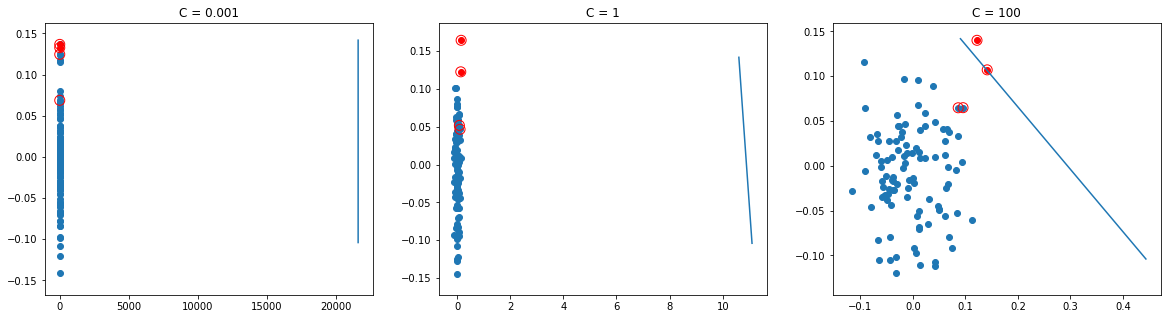

For  Dataset_2


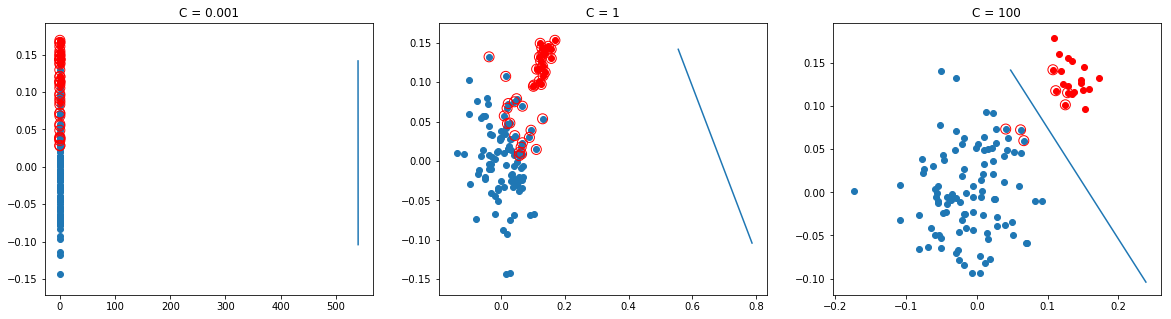

For  Dataset_3


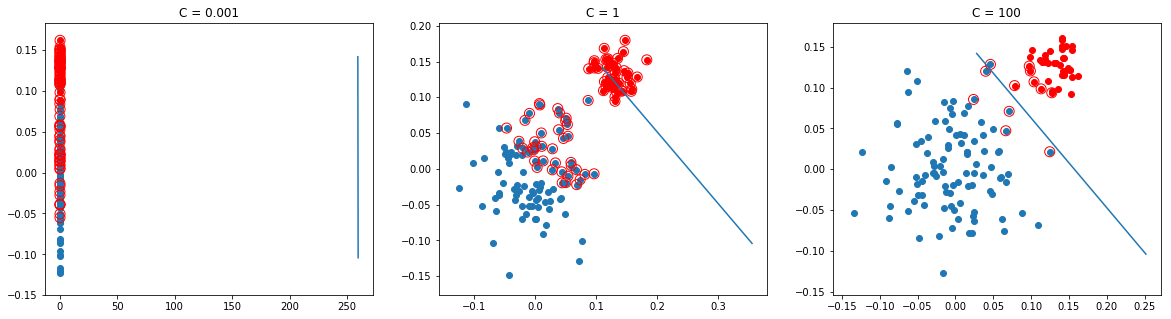

For  Dataset_4


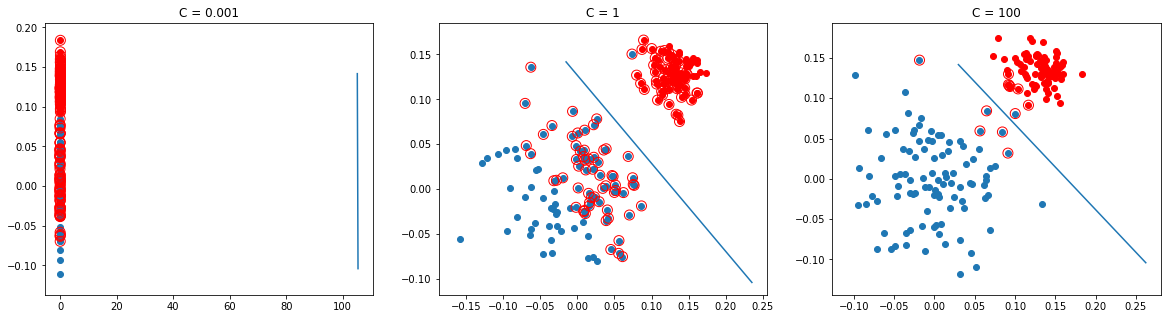

In [103]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
D = ['Dataset_1','Dataset_2','Dataset_3','Dataset_4']
c_term = [0.001,1,100]
SVM_implementation(ratios,D,c_term)


#### OBSERVATIONS:-

1) SVM doesn't work well for imbalanaced dataset.Because very small numbers of points of a particular class doesn't make much effect.

2) As the difference between the ratio of positive and negative points decreases or we can say that as dataset becomes balanced,the hyperplane keep coming closer in between the points and hence tries to separate them well.

3) For small value of C(0.001),the model is not working well on training data due to underfitting.Hyperplane is not even close between the separating points and it is ignoring all the points on the plot.

4) As the value of C increases the model tries to fit well according to the data,and also the hyperplane tends to separate the positive points from negative points.

5) For hard SVM,we want no support vectors or points in between the margin,but since we are using soft margin SVM,therefore some of them may enter into the margin,that's why we try to reduce hinge loss(by controlling C parameter).Number of data points or support vectors in between the margin can be controlled by value of C.As the value of C increases the model will try to reduce number of data points and hence supoort vectors in between the margin.So as the value of C increases,number of support vectors decreases which signifies vthat there are less number of support vectors.In above example same thing is happening.And also if we there are less number of support vectors,it will take less time to compute dot product of x_i(support vector) and x_q(test point or query point).

6) As the data become balanced the number of support vectors increases because becuse if there is a balanced dataset the algorithm will try to find more support vectors due tom presence more number of data points of a particular class.For example,in Dataset 1,there are only 2 negative points and hnece support vectors corresponding negative class will also be less.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [104]:
def LR_implementation(ratios,D,C):
    #print("For C = ",C)
    for j,i in enumerate(ratios):
        print("For ",D[j])
        plt.figure(figsize=(20,5))
        for k in range(len(C)):
            plt.subplot(1, 3, k+1) # https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
            X_p=np.random.normal(0,0.05,size=(i[0],2))
            X_n=np.random.normal(0.13,0.02,size=(i[1],2))
            y_p=np.array([1]*i[0]).reshape(-1,1) # difference between reshape(1,-1) and reshape(-1,1) : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
            y_n=np.array([0]*i[1]).reshape(-1,1)
            X=np.vstack((X_p,X_n))
            y=np.vstack((y_p,y_n))
            
            plt.scatter(X_p[:,0],X_p[:,1])
            plt.scatter(X_n[:,0],X_n[:,1],color='red')
            plt.title("C = {0}".format(C[k]))
        
            clf = LogisticRegression(C=C[k])
            clf.fit(X,y)
            
            y_min, y_max = x1[:, 1].min(), x1[:, 1].max()
            draw_line(clf.coef_[0],clf.intercept_,y_min,y_max)
        plt.show()

For  Dataset_1


<Figure size 1440x360 with 0 Axes>

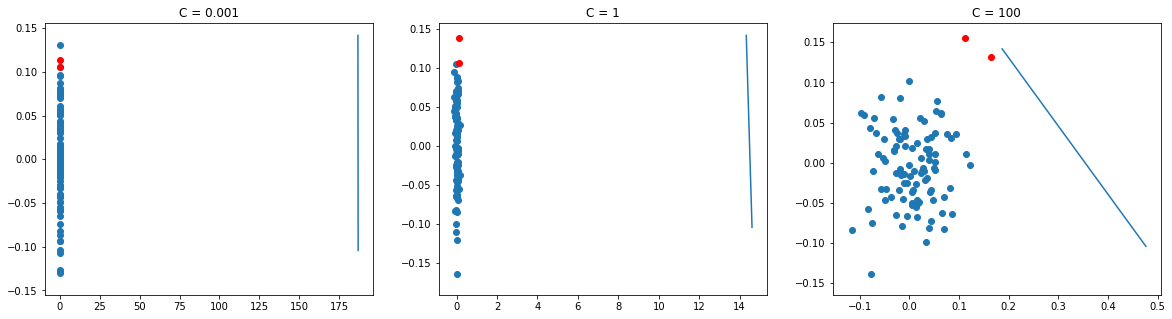

For  Dataset_2


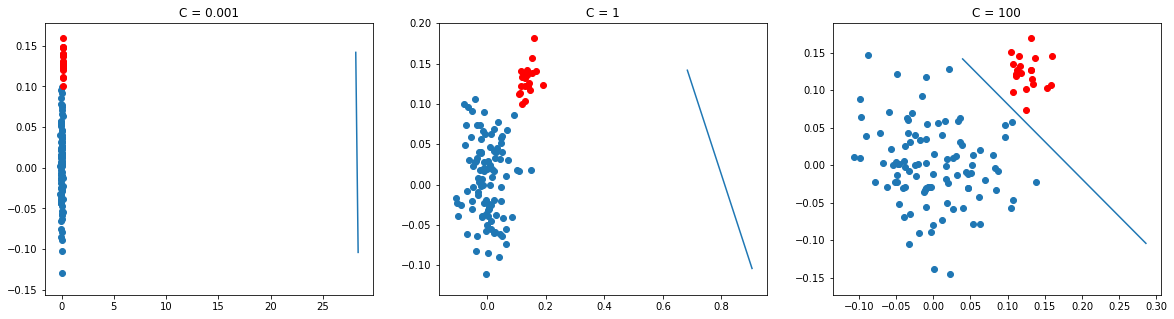

For  Dataset_3


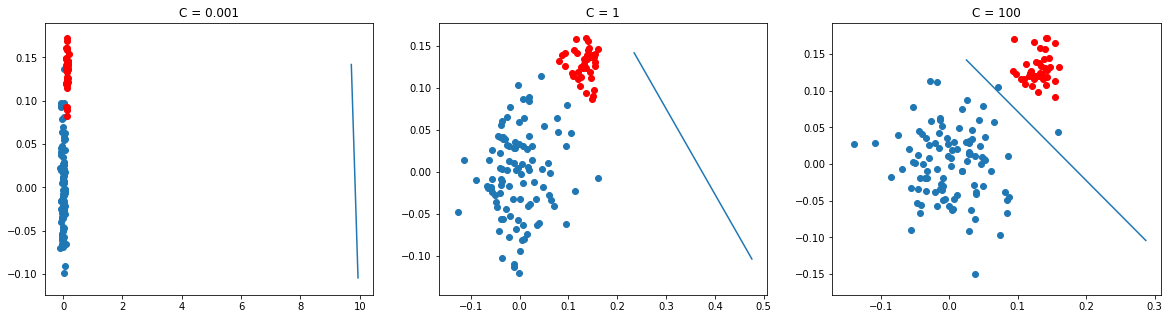

For  Dataset_4


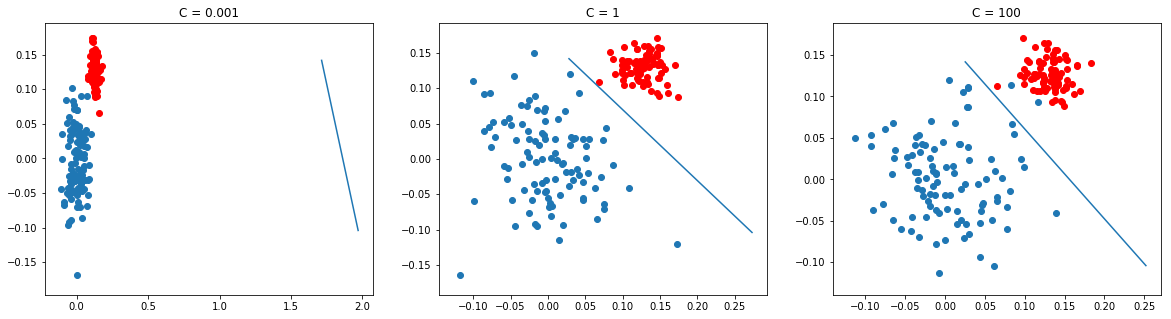

In [105]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
D = ['Dataset_1','Dataset_2','Dataset_3','Dataset_4']
c_term = [0.001,1,100]
LR_implementation(ratios,D,c_term)

#### OBSERVATIONS:-

1) In Logistic Regression(LR),since there is no such concept of support vectors and maximum margin,so this algorithm is just trying to find hyperplane which can separate the two given classes.

2) LR also is not working well for imbalanced dataset.

3) As the dataset becomes balanced,the algoritm fits the data well and finds the best hyperplane which is separating the positive data points from negative data points very well. 